# Tabla de contenidos

* [Instalación del simulador CD++](#instalacionCD++)
* [Simulador CD++](#simuladorCD++)
* [Ejemplos en CD++](#ejemplosCD++)
* [Scripts útiles](#scripts)
* [Hola Mundo!](#holamundo)

In [1]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

In [2]:
try:
    import scipy as sp
except:
    !pip install scipy
    import scipy as sp

In [3]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

In [4]:
# definimos los path a los archivos de interés
OUT_FILENAME = "../fakeNewsPropagation.out"

# con el script tuple_to_real elegimos el índice 0 de la 3-upla
# tuple_to_real.tuple_to_real(OUT_FILENAME, 0)

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL_ORIG = 'time_orig'
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL_ORIG = 'value_orig'
VALUE_COL = 'value'
POPULATION_COL = 'population'
POLITICAL_AFFINITY = 'political_affinity'
MESSAGE_TYPE_COL = 'message_type'
MODEL_ORIGIN_COL = 'model_origin'
MODEL_DEST_COL = 'model_dest'

# parsea cada fila del dataframe
def parse_value(value):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

#conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

#conversion string to list
def value_to_list(value):
    tempValue = value[1:-1]
    return tempValue.split(',')

df_converters = {
     VALUE_COL: parse_value,
     TIME_COL: time_to_secs
 }

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     # converters=df_converters,
                     names=[TIME_COL_ORIG, PORT_COL, VALUE_COL_ORIG]
                    )

salida[TIME_COL]  = salida.apply(lambda row: time_to_secs(row[TIME_COL_ORIG]), axis=1)
salida[VALUE_COL] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG])), axis=1)
salida[POPULATION_COL] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[0], axis=1)
salida[POLITICAL_AFFINITY] = salida.apply(lambda row: value_to_list(str(row[VALUE_COL_ORIG]))[1], axis=1)


outs_estadisticos = salida.loc[ salida['value'].str.len() == 2]
population3 = outs_estadisticos.loc[ salida['population'] == '3']
population3.head()


,time_orig,port,value_orig,time,value,population,political_affinity
1,00:00:01:035:0,out_port,"[3, 0.995788]",1.035,"[3, 0.995788]",3,0.995788
3,00:00:02:051:0,out_port,"[3, 0.96785]",2.051,"[3, 0.96785]",3,0.96785
5,00:00:03:015:0,out_port,"[3, 0.881442]",3.015,"[3, 0.881442]",3,0.881442
17,00:00:09:018:0,out_port,"[3, 0.670089]",9.018,"[3, 0.670089]",3,0.670089
23,00:00:12:025:0,out_port,"[3, 0.72254]",12.025,"[3, 0.72254]",3,0.72254


In [5]:
y_strings = population3[POLITICAL_AFFINITY].tolist()
x_string = population3[TIME_COL].tolist()
y_values = list(map(float, y_strings))
x_values = list(map(float, x_string))

plt.figure(figsize=(10,5))
plt.plot(x_values, y_values,marker='x')
plt.grid(True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Evolucion de la afinidad politica de la poblacion 3');

# Bibliotecas de Python 

En este notebook vamos a utilizar las siguientes bibliotecas de Python:
* pathlib
* pandas
* scipy
* matplotlib

Para instalarlas podemos correr la siguiente línea (si están usando un *venv* deben correrlo dentro del entorno virtual):

```
$ pip install pathlib pandas matplotlib scipy
```

In [21]:
%%bash -s "$CDPP_SRC"

ls

00 - primeros_pasos_resultados_2021-Copy1.ipynb


<a id='instalacionCD++'></a>
# Instalación del simulador CD++

## Máquina virtual

Pueden descargar la máquina virtual de la materia con todas las herramientas de simulación que utilizaremos a lo largo del curso ya instaladas: 
```
ftp://modsimu.exp.dc.uba.ar/VM2021
```

Luego, para correr por ejemplo jupyter-lab lo hacen desde dentro de un entorno virtual:

```
source .env37/bin/activate 
jupyter-lab
```

## Descarga

La forma más senclla de obtener el código fuente del simulador es clonando el repositorio git:

```
 $ git clone https://github.com/SimulationEverywhere/CDPP_ExtendedStates-codename-Santi.git
```


Descargamos el simulador del repositorio [SimulationEverywhere](https://github.com/SimulationEverywhere/CDPP_ExtendedStates-codename-Santi)

In [1]:
try:
    from pathlib import Path
except:
    !pip install pathlib
    from pathlib import Path

In [2]:
SED_HOME = Path.home().joinpath('SED')
# SED_HOME = 'user/SED/'
# URL del repositorio de cd++
CDPP_REPO = 'https://github.com/SimulationEverywhere/CDPP_ExtendedStates-codename-Santi.git'

In [3]:
%%bash -s "$SED_HOME" "$CDPP_REPO"

# $1 es el directorio donde vamos a clonar el cd++ (CDPP_DIR)
# $2 la URL del repo (CDPP_REPO)

# si el directorio existe, no hago nada, caso contrario, creo la carpeta
[ -d $1 ] || mkdir -p $1
cd $1

# si el directorio existe, no hago nada, caso contrario, traigo el simu con git clone
[ -d CDPP_ExtendedStates-codename-Santi ] || git clone $2 

echo "Finalizado!"

Finalizado!


In [4]:
#Directorio base donde está instalado el siumulador
CDPP_DIR = SED_HOME.joinpath('CDPP_ExtendedStates-codename-Santi')
# CDPP_DIR = SED_HOME+'CDPP_ExtendedStates-codename-Santi'

### Prerequisitos

Para instalar el simulador necesitamos tener instaladas ls siguientes bibliotecas:

 * `GCC 4.7` or higher (with C++11 support)
 * `bison`
 * `GNU make`
 
 La forma más sencilla es utilizando apt:
 
 ```
 $ sudo apt install build-essential bison
 ```

## Compilación

Para compilar el _kernel_ del simulador, vamos al directorio en donde está ubicado el código fuente y corremos make:

```
 $ cd $CDPP_DIR/CDPP_ExtendedStates-codename-Santi/src
 $ make
```

In [5]:
CDPP_SRC = CDPP_DIR.joinpath('src')

In [6]:
%%bash -s "$CDPP_SRC"

cd $1

ls

# limpiamos compilaciones viejas si las hay
make clean

# compilamos cd++ (esto demora unos minutos y no se ve ninguna salida... sólo mensajes de g++ y warnings al final)
make -j4

bin
cd++
Makefile
tools
make -C cd++ clean OBJ_DIR=obj
make[1]: Entering directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics clean OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make[2]: Entering directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu clean OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++	
make[3]: Entering directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu'
make[3]: Leaving directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/cpu'
make -C queue clean OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++	
make[3]: Entering directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics/queue'
make[3]: Leaving directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi

tdcell.cpp: In member function ‘virtual Model& TransportDelayCell::externalFunction(const MessageBag&)’:
tdcell.cpp:198:60: warning: suggest parentheses around ‘&&’ within ‘||’ [-Wparentheses]
  198 |   if( (UseQuantum().Active() || UseDynQuantum().Active())  &&
      |       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~
  199 |     ( *valueWithQuantum(*rc, QuantumValue()) != *valueWithQuantum(ltb, QuantumValue()) )
      |     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tdcell.cpp:206:4: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
  206 |    for ( cursorAux = queueVal().begin(); cursorAux != queueVal().end() && cursorAux->first <= valueTime; cursorAux++ );
      |    ^~~
tdcell.cpp:208:5: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
  208 |     TDCellState::QueueValue qv(calculateOutPort(pvCursor->first), pvCursor->second);
      |     ^~~~~~~~~~~
In fi

Una vez que termina se crea el subdirectorio `bin` contendrá el archivo ejecutable cd++:

In [7]:
%%bash -s "$CDPP_SRC"

cd $1/bin

ls

cd++
libsimu.a


<a id='simuladorCD++'></a>
# Simulador CD++

Una vez instalado interactuamos con el simulador por línea de comandos. Para ver la ayuda del simulador lo invocamos con la opción `-h`:

In [8]:
%%bash -s "$CDPP_SRC"

cd $1

bin/cd++ -h

bin/cd++ [-ehlmotdpvbfrsqw]
	e: events file (default: none)
	h: show this help
	l: logs all messages to a log file (default: /dev/null)
	L[I*@XYDS]: log modifiers (logs only the specified messages) 
	m: model file (default : model.ma)
	o: output (default: /dev/null)
	t: stop time (default: Infinity)
	d: set tolerance used to compare real numbers
	p: print extra info when the parsing occurs (only for cells models)
	D: partition details file (default: /dev/null)
	P: parallel partition file (will run parallel simulation)
	v: evaluate debug mode (only for cells models)
	b: bypass the preprocessor (macros are ignored)
	f: flat debug mode (only for flat cells models)
	r: debug cell rules mode (only for cells models)
	s: show the virtual time when the simulation ends (on stderr)
	q: use quantum to compute cell values
	y: use dynamic quantum (strategy 1) to compute cells values
	Y: use dynamic quantum (strategy 2) to compute cells values
	w: sets the width and precision (with form xx-yy) to sh

En los ejemplos que siguen vamos a utilizar los parámetros:

* `-m` para pasarle el modelo a simular
* `-t` tiempo final de la simulación. Formato **HH:MM:SS:MS**:
  * HH: cantidad de horas
  * MM: minutos (0 a 59)
  * SS: segundos (0 a 59)
  * MS: milisegundos (0 a 999)
* `-e` para pasarle un archivo con eventos de la o las entradas del modelo
* `-l` para indicarle dónde queremos almacenar los mensajes intercambiados internamente por los modelos atómicos y acoplados
* `-o` para indicarle dónde queremos almacenar la información de la o las salidas del modelo
    

<a id='ejemplosCD++'></a>

# Ejemplos en CD++

Con el simulador vienen algunos ejemplos en `examples/`:

In [9]:
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')

# podemos ver el contenido de la variable de entorno
# print(CDPP_EXAMPLES)

In [10]:
%%bash -s "$CDPP_EXAMPLES"

cd $1

ls

addconstant
addconstant.zip
const_generator (copy)
fake_news_generator
generator
media
population
pulse
qss
semaforo
semaforo_old
semaforo.zip
SimpleNetwork
SimpleNetwork.zip
teacup
teacup_old
teacup.zip
template
template.zip
transducer
transducer.zip


* **Generador de eventos periódicos (*const_generator*):** Generador que produce eventos periódicos con una entrada de _stop_ y una salida. La frecuencia de los eventos se define por medio de un parámetro _frequency_.
* **Generador de eventos aleatorios (*generator*):** Generador que produce eventos cada un tiempo aleatorio y cuya salida toma valores que se incrementan con cada evento a partir de un valor inicial. Tiene una única entrada de _stop_ y parámetros: _distribution_, _initial_, _increment_ correspondientes a la distribución de los eventos, el valor inicial de la salida y el incremento del valor del evento de salida respectivamente.
* **Pulsos (*pulse*):** Generador de eventos periódicos de eventos con dos entradas: _start_ y _stop_ y una salida. Los eventos de salida toman un valor aleatorio distribuido de forma uniforme entre $0$ y $1$.
* **QSS (*qss*):** Se trata de dos integradores conectados de forma circular que evolucionan a partir de condiciones iniciales:
\begin{align*}
    \dot{x}(t) &= y(t)\\
    \dot{y}(t) &= -x(t)
\end{align*}

<a id='scripts'></a>

# Scripts útiles

En la carpeta `scripts/` pueden encontrar el script `tuple_to_real.py` que utilzaremos para convertir un archivo con tuplas de valores en un achivo de reales:

In [11]:
%%bash -s "$CDPP_DIR"

cd $1/scripts

ls

__pycache__
tuple_to_real.py


<a id='holamundo'></a>

# Ejemplo _Hola Mundo!_

Tomemos el ejemplo **Pulse** en `examples/pulse/`. Vamos a ejecutar esta simulación para verificar que el simulador se instaló correctamente.

## Descripción del modelo (modelo conceptual)

* Este modelo atómico genera internamente eventos a intervalos regulares
* Tiene dos entradas _start_ y _stop_
* Tiene una única salida _out_
* El valor de los eventos de salida sigue una distribución uniforme entre $0$ y $100$

<center></center>

## Simulador y modelo por separado

### Modelo: modelo acoplado y componentes


In [14]:
%%bash -s "$CDPP_EXAMPLES"

cd '../model/'

cat fakeNewsPropagationAmalia.ma

[top]
components : fakenewsgenerator@fakenewsgenerator mediaOfficial@media mediaOpposition@media populationscoupled
out : out_port
in : stop
link : stop stop@fakenewsgenerator
link : out@fakenewsgenerator in@mediaOfficial
link : out@fakenewsgenerator in@mediaOpposition
link : out@mediaOfficial in@populationscoupled
link : out@mediaOpposition in@populationscoupled

[fakenewsgenerator]
frequency : 00:00:01:00

[mediaOfficial]
party : 1

[mediaOpposition]
party : 0

[populationscoupled]
components : socialnetwork@socialnetwork population1@population population2@population population3@population population4@population 
out : out_port
in : news
link : news in@population1
link : news in@population2
link : news in@population3
link : news in@population4
link : out@population1 in@socialnetwork
link : out@population2 in@socialnetwork
link : out@population3 in@socialnetwork
link : out@population4 in@socialnetwork
link : out@socialnetwork in@population1
link : out@socialnetwork in@population2
link

### Simulador CD++



Por medio de `make` compilamos el modelo:

In [15]:
%%bash -s "$CDPP_EXAMPLES"

ls

cd '../src/'

#make clean

make -j4

00 - primeros_pasos_resultados_2021-Copy1.ipynb
make -C ../../../SED/CDPP_ExtendedStates-codename-Santi/src/cd++ cd++ OUT_DIR=/home/matias/Desktop/fakeNewsPropagator/src/bin MODEL_FLAGS=-DREGISTER_ATOMICS
make[1]: Entering directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make -C /home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/cell OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make[2]: Entering directory '/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C queue OBJ_DIR=obj SRC_DIR=/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C qss OBJ_DIR=obj SRC_DIR=/home/mati

/usr/bin/ld: /home/matias/Desktop/fakeNewsPropagator/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/matias/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


Si todo fue bien, ahora tenemos un directorio `bin` dentro de `examples/pulse/src/` que es una versión del simulador que incluye el modelo atómico `pulse`:

In [16]:
%%bash -s "$CDPP_EXAMPLES"

ls
cd '../src/'

# para ver dónde estamos paradxs
pwd

ls bin

00 - primeros_pasos_resultados_2021-Copy1.ipynb
/home/matias/Desktop/fakeNewsPropagator/src
cd++
CoupledPopulation.o
FakeNewsGenerator.o
libsimu.a
Media.o
Population.o
reg.o
SocialNetworks.o


## Simulación del modelo en CD++

El archivo de eventos de entrada `pulse.ev` contiene los eventos externos enviados a los puertos de entrada del modelo acoplado de jerarquía superior (_top model_).

Los eventos tienen una etiqueta de tiempo con formato VTime: HH:MM:SS:MS.

Podemos ver varios eventos externos enviados al puerto de entrada _start_ entre los instantes 00:00:00:15 y 00:02:08:45.

Podemos ver el evento de terminación enviado al puerto de entrada _stop_ del modelo en el instante 00:05:00:00.

In [23]:
%%bash -s "$CDPP_EXAMPLES"

cd '../model/'
ls
head fakeNewsPropagation.ev

fakeNewsPropagationAmalia.ma
fakeNewsPropagation.ev
fakeNewsPropagation.ma
00:10:00:00 stop 1

Ahora podemos ejecutar la simulación usando la descripción en el subdirectorio `model`:

In [24]:
%%bash -s "$CDPP_EXAMPLES"

cd '../src/'

bin/cd++ -m ../model/fakeNewsPropagationAmalia.ma  \
         -e ../model/fakeNewsPropagation.ev  \
         -l ../fakeNewsPropagation.log \
         -o ../fakeNewsPropagation.out

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ../model/fakeNewsPropagationAmalia.ma
Loading events from ../model/fakeNewsPropagation.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ../fakeNewsPropagation.log
Output to: ../fakeNewsPropagation.out

Podemos notar que no estamos usando la opción `-t` porque la simulación termina por el evento de entrada en el puerto _stop_.

## Análisis de los resultados

Veamos los eventos generados en la salida del atómico en el archivo _out_. Recordemos que los valores de los eventos son tupla de 3 elementos.

In [61]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/population/

head population.out

00:10:00:000:0 out_port [1, 1, 1, 1, 1, 100, 0, 1, 0, 1, 1, 0.6875, 1]


Veamos el contenido de los archivos de _log_ de mensajes:

In [62]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

cat pulse.log

[logfiles]
ParallelRoot : ../pulse.log00 
top : ../pulse.log02 
pulse : ../pulse.log01 


In [63]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.log00

0 / L / D / 00:00:00:000:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:00:015:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:00:030:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:00:045:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:01:020:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:01:040:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:03:010:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / D / 00:00:04:045:0 / top(02) / 00:00:05:000:0 / ParallelRoot(00)
0 / L / Y / 00:00:09:045:0 / top(02) / out_port / [32, 0, 1, 2] / ParallelRoot(00)
0 / L / D / 00:00:09:045:0 / top(02) / 00:00:00:000:0 / ParallelRoot(00)


In [63]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.log01

0 / L / I / 00:00:00:000:0 / top(02) / pulse(01)
0 / L / X / 00:00:00:015:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:00:015:0 / top(02) / pulse(01)
0 / L / X / 00:00:00:030:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:00:030:0 / top(02) / pulse(01)
0 / L / X / 00:00:00:045:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:00:045:0 / top(02) / pulse(01)
0 / L / X / 00:00:01:020:0 / top(02) / start /      1.00000 / pulse(01)
0 / L / * / 00:00:01:020:0 / top(02) / pulse(01)
0 / L / X / 00:00:01:040:0 / top(02) / start /      1.00000 / pulse(01)


In [64]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/

head pulse.log02

0 / L / I / 00:00:00:000:0 / ParallelRoot(00) / top(02)
0 / L / D / 00:00:00:000:0 / pulse(01) / 00:00:01:000:0 / top(02)
0 / L / X / 00:00:00:015:0 / ParallelRoot(00) / start /      1.00000 / top(02)
0 / L / * / 00:00:00:015:0 / ParallelRoot(00) / top(02)
0 / L / D / 00:00:00:015:0 / pulse(01) / 00:00:01:000:0 / top(02)
0 / L / X / 00:00:00:030:0 / ParallelRoot(00) / start /      1.00000 / top(02)
0 / L / * / 00:00:00:030:0 / ParallelRoot(00) / top(02)
0 / L / D / 00:00:00:030:0 / pulse(01) / 00:00:01:000:0 / top(02)
0 / L / X / 00:00:00:045:0 / ParallelRoot(00) / start /      1.00000 / top(02)
0 / L / * / 00:00:00:045:0 / ParallelRoot(00) / top(02)


Graficamos los resultados que obtuvimos en el archivo `pulse.out`:

In [3]:
%%bash -s "$CDPP_EXAMPLES"

cd ..
ls

README.md
fakeNewsPropagation.out
model
notebook
src
test


In [4]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 16.7 MB 4.9 MB/s 
     |████████████████████████████████| 13.9 MB 7.8 MB/s 
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

matplotlib 1.3.1 requires nose, which is not installed.
You should consider upgrading via the '/System/Library/Frameworks/Py

In [6]:
try:
    import scipy as sp
except:
    !pip install scipy
    import scipy as sp

In [7]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

In [12]:
OUT_FILENAME = "/../fakeNewsPropagation.out"


In [15]:
%%bash -s "$CDPP_EXAMPLES"

head ../fakeNewsPropagation.out



00:00:01:018:0 out_port [1, 0.532255, 0, 0, 35, 1, 0.6, 0.6, 0.5, 0.6, 0.291532, 2, 1]
00:00:01:035:0 out_port [3, 0.995788]
00:00:02:035:0 out_port [0, 0.801755, 0.087965, 0, 75, 0, 0.2, 0.2, 0.4, 0.1, 0.673715, 4, 0.722025]
00:00:02:051:0 out_port [3, 0.96785]
00:00:03:001:0 out_port [0, 0.188523, 0.65642, 0, 35, 1, 0.6, 0.6, 0.5, 0.6, 0.455618, 2, 0.904582]
00:00:03:015:0 out_port [3, 0.881442]
00:00:04:003:0 out_port [0, 0.858278, 0.28985, 0, 35, 1, 0.6, 0.6, 0.5, 0.6, 0.493516, 2, 0.724906]
00:00:04:007:0 out_port [1, 0.756534]
00:00:05:007:0 out_port [0, 0.682556, 0.732951, 0, 50, 1, 0.5, 0.8, 0.7, 0.3, 0.489438, 3, 0.689123]
00:00:05:024:0 out_port [1, 0.716727]


In [18]:
# definimos los path a los archivos de interés
OUT_FILENAME = "../fakeNewsPropagation.out"

# con el script tuple_to_real elegimos el índice 0 de la 3-upla
# tuple_to_real.tuple_to_real(OUT_FILENAME, 0)

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL_ORIG = 'time_orig'
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL_ORIG = 'value_orig'
VALUE_COL = 'value'
MESSAGE_TYPE_COL = 'message_type'
MODEL_ORIGIN_COL = 'model_origin'
MODEL_DEST_COL = 'model_dest'

# parsea cada fila del dataframe
def parse_value(value: str):
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_secs(time):
    h, m, s, ms, r = time.split(':')
    return float(h)*60*60. + float(m)*60. + float(s) + float(ms)/1000. + float(r)/1000.

# df_converters = {
#     VALUE_COL: parse_value,
#     TIME_COL: time_to_secs
# }

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     # Se puede usar esto para convertir los valores directamente:
                     # converters=df_converters,
                     names=[TIME_COL_ORIG, PORT_COL, VALUE_COL_ORIG]
                    )

salida[TIME_COL]  = salida.apply(lambda row: time_to_secs(row[TIME_COL_ORIG]), axis=1)
salida[VALUE_COL] = salida.apply(lambda row: parse_value(str(row[VALUE_COL_ORIG])), axis=1)

salida.head()

SyntaxError: invalid syntax (<ipython-input-18-627488381f1a>, line 18)

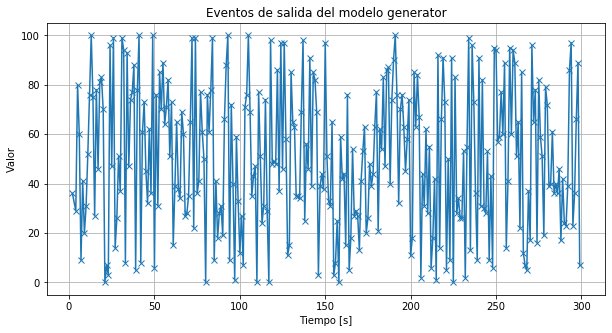

In [69]:
y_values,_,_ = salida[VALUE_COL].str
x_values = salida[TIME_COL]

plt.figure(figsize=(10,5))
plt.plot(x_values, y_values,marker='x')
plt.grid(True)
plt.xlabel('Tiempo [s]')
plt.ylabel('Valor')
plt.title('Eventos de salida del modelo generator');

Podemos observar que el último evento se produjo aproximadamente a los $300~\text{s}$, es decir, 00:05:00:000.

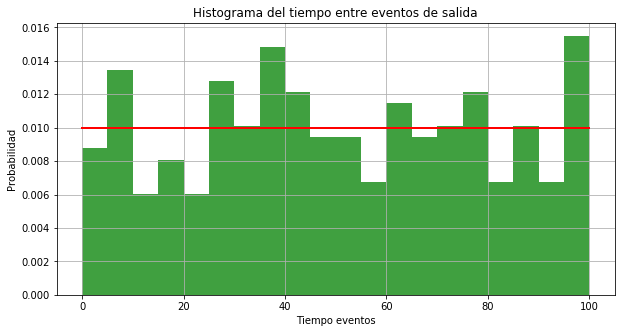

In [70]:
import scipy.stats as sps

plt.figure(figsize=(10,5))

# histograma de los eventos de salida
n, bins, patches = plt.hist(y_values, 20, density=True, facecolor='g', alpha=0.75)

# funcion de densidad de probabilidad teorica
u = sps.uniform.pdf(bins, loc=0, scale=100)
plt.plot(bins,u,'r',linewidth=2)

plt.xlabel('Tiempo eventos')
plt.ylabel('Probabilidad')
plt.title('Histograma del tiempo entre eventos de salida')
plt.grid(True)

# Consideraciones importantes de CD++

## Simulación de un modelo atómico _ad-hoc_

Para esto sugerimos tomar como base el ejemplo pulse incluído en el proyecto (ver `examples/pulse/src`). 
En particular, es importante incluir un Makefile que defina al menos:

 * La variable `KERNEL_SRC` apuntando al directorio en donde se ubica el código fuente de cd++.
 * La variable `MODEL_FLAGS` con valor `-DREGISTER_ATOMICS`. Esta es para compilar el código responsable de registrar el modelo atómico deseado en el _kernel_ del simulador.
 * La inclusión de definiciones y reglas de compilación provistas para el simulador:
 
```
    include $(KERNEL_SRC)/Makefile.rules
    include $(KERNEL_SRC)/Makefile.defs
```

También es importante incluir una implementación de la función:

```C++
void register_atomics_on(ParallelModelAdmin &admin)
```

cuyo propósito es registrar en el _kernel_ los modelos atómicos que se quieren usar. En general, es suficiente con incluir una línea como la que sigue:

```C++
admin.registerAtomic(NewAtomicFunction<ModelClass>(), "Model name");
```

Si miramos el contenido del archivo `reg.cpp`, veremos cómo se regitra el modelo en el kernel del simulador:

In [71]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/pulse/src/

cat reg.cpp

#include "pmodeladm.h"
#include "register.h"

#include "pulse.h"


void register_atomics_on(ParallelModelAdmin &admin)
{
	admin.registerAtomic(NewAtomicFunction<Pulse>(), ATOMIC_MODEL_NAME);
}


Aquí `Pulse` es el nombre de la clase que implementa nuestro modelo y la macro `ATOMIC_MODEL_NAME` define su nombre (el cual tiene que ser único).